In [2]:
# imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


In [3]:
# get dataframe
df = pd.read_csv('../data/customer_churn_dataset-training-master.csv')

In [4]:
# drop nulls
df.dropna(axis=0, inplace=True)

In [5]:
# dtypes to int
df = df.astype({'CustomerID':'int', 'Age': 'int', 'Tenure':'int', 'Usage Frequency':'int', 'Support Calls':'int', 'Total Spend':'int', 'Last Interaction':'int',  'Churn':'int'})

In [6]:
# set index
df.set_index('CustomerID', inplace=True)

In [7]:
#columns to numeric
df['Gender'] = df['Gender'].map({'Male': 1, 'Female':0});
df = pd.get_dummies(df, columns=['Subscription Type'], dtype=int)
df['Contract Length'] = df['Contract Length'].map({'Monthly':1, 'Quarterly':3,'Annual':12 })

In [8]:
#reorder cols 
columns = [col for col in df.columns if col != 'Churn'] + ['Churn']
df = df[columns]

## Churn Rate

**Churn**: cuando un cliente deja de usar un servicio.

**Impacta en KPIs**: ingresos, crecimiento y retención.

**Problema**: identificar clientes con alto riesgo de abandono.

**Solución**: _predecir_ clientes con alto riesgo de abandono mediante clasificación.

In [9]:
# preview: .head()
df.head(5)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Churn
CustomerID,,,,,,,,,,,,,
2,30,0,39,14,5,18.0,12,932,17,0,0,1,1
3,65,0,49,1,10,8.0,1,557,6,1,0,0,1
4,55,0,14,4,6,18.0,3,185,3,1,0,0,1
5,58,1,38,21,7,7.0,1,396,29,0,0,1,1
6,23,1,32,20,5,8.0,1,617,20,1,0,0,1


In [10]:
print('df shape: ', df.shape)


df shape:  (440832, 13)


In [11]:
df['Churn'].value_counts(normalize=True)

Churn
1    0.567107
0    0.432893
Name: proportion, dtype: float64

<Axes: >

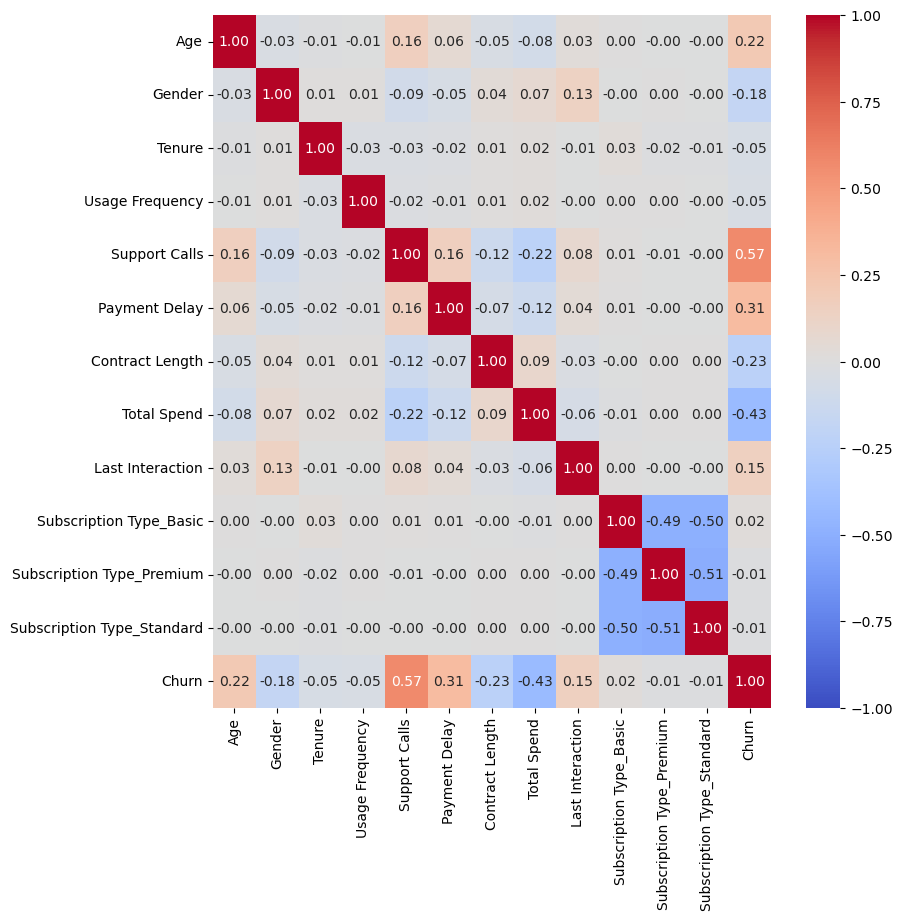

In [12]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), vmin=-1, annot=True, cmap='coolwarm', fmt='.2f')

In [13]:
X = df[['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Contract Length', 'Total Spend', 'Last Interaction',
       'Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (352665, 12)
y_train (352665,)
X_test (88167, 12)
y_test (88167,)


In [14]:
logres_model = LogisticRegression(max_iter=10000)
logres_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [15]:
#train_pred = logres_model.predict(X_train)
test_pred = logres_model.predict(X_test)

#train_prob = logres_model.predict_proba(X_train)[:, 1]
test_prob = logres_model.predict_proba(X_test)[:, 1]

In [16]:
#train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

#train_accuracy_report = classification_report(y_train, train_pred)
test_accuracy_report = classification_report(y_test, test_pred)

#train_accuracy_roc_auc = roc_auc_score(y_train, train_pred)
test_accuracy_roc_auc = roc_auc_score(y_test, test_pred)

In [17]:
print('--------accuracy---------')
#print(f'1. Training Accuracy Score: {train_accuracy:.2f}')
print(f'2. Testing Accuracy Score: {test_accuracy:.2f}')
print('--------classification reports---------')
#print(f'1. Training Classification Report :\n {train_accuracy_report}')
print(f'2. Testing Classification Report :\n {test_accuracy_report}')
print('--------roc_auc---------')
#print(f'1. Training roc_auc Score :\n {train_accuracy_roc_auc}')
print(f'2. testing roc_auc score :\n {test_accuracy_roc_auc}')

--------accuracy---------
2. Testing Accuracy Score: 0.86
--------classification reports---------
2. Testing Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.85      0.84     38063
           1       0.89      0.86      0.87     50104

    accuracy                           0.86     88167
   macro avg       0.85      0.86      0.85     88167
weighted avg       0.86      0.86      0.86     88167

--------roc_auc---------
2. testing roc_auc score :
 0.8564770446795208


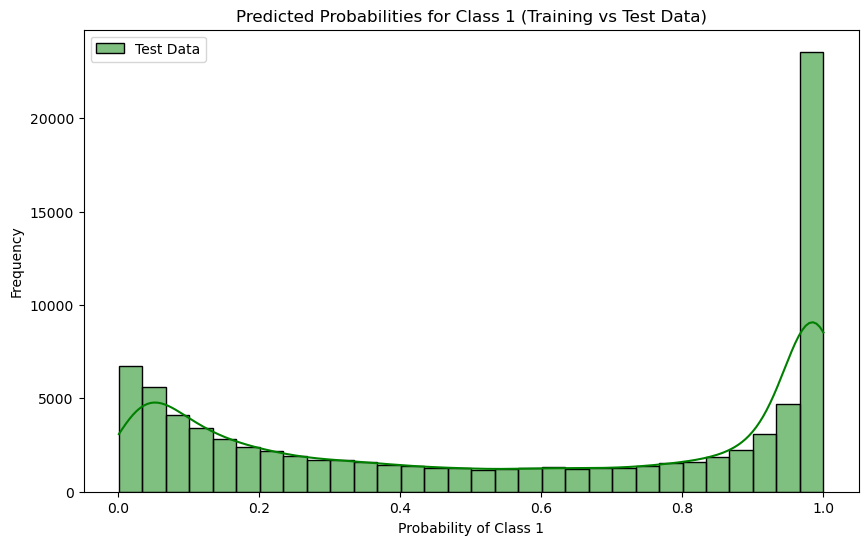

In [18]:
# Plot histograms
plt.figure(figsize=(10, 6))
#sns.histplot(train_prob, kde=True, color='blue', label='Training Data', bins=30)
sns.histplot(test_prob, kde=True, color='green', label='Test Data', bins=30)
plt.title('Predicted Probabilities for Class 1 (Training vs Test Data)')
plt.xlabel('Probability of Class 1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

 train has a huge amount of high confidence predictions. test follows a similar pattern. Therefore it is well calibrated and effectively generalises new data.

In [19]:
# Inspect the coefficients
coeffs = logres_model.coef_[0]
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeffs})
print(feature_importance.sort_values(by='Coefficient', ascending=False))


                       Feature  Coefficient
4                Support Calls     0.685346
9      Subscription Type_Basic     0.145575
5                Payment Delay     0.103247
8             Last Interaction     0.054873
11  Subscription Type_Standard     0.040407
0                          Age     0.034478
10   Subscription Type_Premium     0.028285
7                  Total Spend    -0.005461
2                       Tenure    -0.007001
3              Usage Frequency    -0.013332
6              Contract Length    -0.117680
1                       Gender    -1.054900


## pipeline for params

In [20]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

In [23]:
pipe = Pipeline([
    ('scaler',  StandardScaler()),
    ('poly_feat', PolynomialFeatures(degree=2)),
    ('log_reg',  LogisticRegression(max_iter=10000))
])

params = {
    'poly_feat__degree' : [1, 2],
    'log_reg__C' : np.logspace(-2, 0, num=3),
    'log_reg__solver' : ['liblinear']
}

random_search = RandomizedSearchCV(
    pipe, param_distributions=params, cv=3, n_iter=3, scoring='accuracy', random_state=42, verbose=2
)

random_search.fit(X_train, y_train)

print('Best Params: \n', random_search.best_params_)
print('Best Score (accuracy): \n', random_search.best_score_)
print('Best Estimator: \n ', random_search.best_estimator_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=1; total time=   0.4s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=1; total time=   0.3s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=1; total time=   0.3s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=2; total time=   3.9s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=2; total time=   3.6s
[CV] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=2; total time=   4.1s
[CV] END log_reg__C=1.0, log_reg__solver=liblinear, poly_feat__degree=2; total time=   7.0s
[CV] END log_reg__C=1.0, log_reg__solver=liblinear, poly_feat__degree=2; total time=   7.6s
[CV] END log_reg__C=1.0, log_reg__solver=liblinear, poly_feat__degree=2; total time=   7.3s
Best Params: 
 {'poly_feat__degree': 2, 'log_reg__solver': 'liblinear', 'log_reg__C': 1.0}
Best Score (accu

In [24]:
best_log_reg = random_search.best_estimator_
hyper_param_test_pred = best_log_reg.predict(X_test)

In [ ]:
hyper_param_test_accuracy = accuracy_score(y_test, hyper_param_test_pred)

hyper_param_test_accuracy_report = classification_report(y_test, hyper_param_test_pred)

hyper_param_test_accuracy_roc_auc = roc_auc_score(y_test, hyper_param_test_pred)

In [27]:
print('--------hyper_param_accuracy---------')
print(f'1. HyperParam Testing Accuracy Score: \n  {hyper_param_test_accuracy:.2f}')
print('--------hyper_paramclassification_report---------')
print(f'2. HyperParam Testing Classification Report :\n {hyper_param_test_accuracy_report}')
print('--------hyper_param_roc_auc---------')
print(f'3. HyperParam Testing roc_auc score :\n {hyper_param_test_accuracy_roc_auc}')

--------hyper_param_accuracy---------
1. HyperParam Testing Accuracy Score: 
  0.97
--------hyper_paramclassification_report---------
2. HyperParam Testing Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     38063
           1       0.98      0.96      0.97     50104

    accuracy                           0.97     88167
   macro avg       0.96      0.97      0.97     88167
weighted avg       0.97      0.97      0.97     88167

--------hyper_param_roc_auc---------
3. HyperParam Testing roc_auc score :
 0.9674564122556566
